<a href="https://colab.research.google.com/github/lyanasky/hr_df_analysis/blob/main/Advanced_google_data_analytics_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Description**
This is the Google capstone project in Google advanced data analytics. it contains a csv  dataset to be used in building predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.
In this project, you will create two deliverables: a one-page summary and a code notebook. The summary is aimed at external stakeholders and provides a concise overview of the project, including its objectives, methodology, and key findings. The code notebook contains the complete implementation of the project, focusing on either a regression or a machine learning model to predict employee attrition.

The deliverables include model evaluation, interpretation (if applicable), relevant data visualizations, ethical considerations, and a list of resources used for troubleshooting and finding solutions. The evaluation will assess the performance of the chosen model, while interpretation will provide insights into the practical implications of the predictions.

Throughout the project, it is crucial to address ethical considerations and potential biases in the data or model. Demonstrating the ability to mitigate biases and limitations will be essential.

By presenting these artifacts, i will demonstrate my skills in data analysis, model development, communication, and problem-solving. This project showcases your ability to deliver meaningful insights to stakeholders and make data-driven decisions.
 In this analysis i used the PACE  strategy for this project in my analysis process.



# **PACE** **STAGES**
The PACE stages are:
1. P- Prepare Stage
2. A- Analyse Stage
3. C- Construct Stage
4. E- Execute Stage


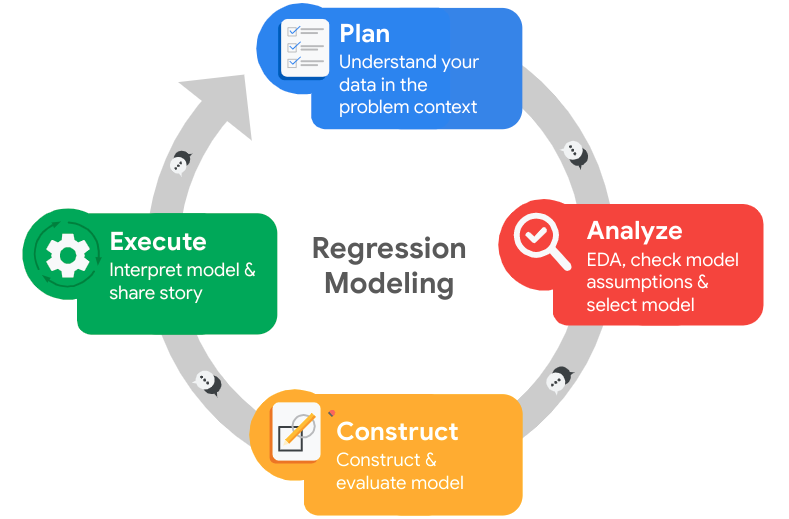

In [ ]:
from PIL import Image
from IPython.display import display

EDA_path = '/content/drive/MyDrive/EDA.png'

EDA_image = Image.open(EDA_path)
display(EDA_image)

#**PACE-Plan Stage**

I will use this PACE strategy to document and record decisions and reflections as I work on my analysis to answer key questions and objectives.

**BUSINESS SCENERIOS AND PROBLEMS**

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to me as a data analytics professional and ask me to provide data-driven suggestions based on my understanding of the data. They have the following question: what’s likely to make the employee leave the company?

My goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If i am able to predict employees that are likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

#Familiarize myself with the HR dataset

In this dataset, there are 14,999 rows, 10 columns, and these variables

 # questions
1. Who are the stakeholders for this project?
2. What are they trying to solve or accomplish?
3. What are my initial observations when you explore the data?
4. What resources do i find myself using as you complete this stage?
5. Do i have any ethical considerations in this stage?



In [ ]:
# import liberaries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# import dataset
# csv link https://drive.google.com/file/d/1mNj3kmnjqWDUH_pKFpNtgarAgfOPNEjW/view?usp=drive_link

In [ ]:
hr_df = pd.read_csv('/content/drive/MyDrive/hr_data_set.csv')
hr_df.info()
hr_df.head(n = 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


I loaded the dataframe using pandas and created a new dataframe hr_df. This enables me to store my dataframe for future analysis.


#Gather descriptive statistics about the data


In [ ]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#Rename columns


As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
hr_df = hr_df.rename(columns={'Work_accident': 'work_accident',
                              'average_montly_hours': 'average_monthly_hours',
                              'time_spend_company': 'tenure',
                              'Department': 'department'})
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

# Check for missing values

Check for any missing values in the data.

In [ ]:
hr_df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data

#Check duplicates
Check for any duplicate entries in the data.

In [ ]:
hr_df.duplicated().sum()

3008

3,008 rows contain duplicates. That is 20% of the data.

# Inspect some rows containing duplicates as needed

In [ ]:
hr_df[hr_df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
396,0.46,0.57,2,139,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
866,0.41,0.46,2,128,3,0,1,0,0,False,False,True,False,False,False,False,False,False,False
1317,0.37,0.51,2,127,3,0,1,0,1,False,False,False,False,False,False,False,True,False,False
1368,0.41,0.52,2,132,3,0,1,0,0,False,True,False,False,False,False,False,False,False,False
1461,0.42,0.53,2,142,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


The above output shows the first five occurences of rows that are duplicated farther down in the dataframe. How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response for every column?

I could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary. With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. You can proceed by dropping them.

# Drop duplicates and save resulting dataframe in a new variable as needed


In [ ]:
df1 = hr_df.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed

In [ ]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


#Check outliers
Check for outliers in the data.

# Create a boxplot to visualize distribution of `tenure` and detect any outliers

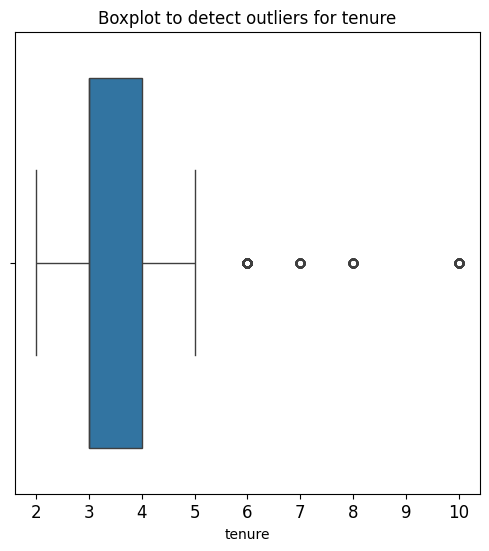

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

The boxplot above shows that there are outliers in the tenure variable.

It would be helpful to investigate how many rows in the data contain outliers in the tenure column.

# Determine the number of rows containing outliers

In [ ]:
# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove these outliers based on the type of model you decide to use

PACE: Analyze Stage
Perform EDA (analyze relationships between variables)


1. What did I observe about the relationships between variables?
2. What did I observe about the distributions in the data?
3. What transformations did I make with your data? Why did you chose to make those decisions?
4. What are some purposes of EDA before constructing a predictive model?
5. What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
6. Do you have any ethical considerations in this stage?

1. Observations about the relationships between variables:

There was a negative correlation between satisfaction level and the likelihood of an employee leaving the company.
Employees who had higher evaluations were more likely to leave the company.
There was a positive correlation between the number of projects and average monthly hours.
Employees who had work accidents were less likely to leave the company.

2. Observations about the distributions in the data:

Employees with satisfaction levels between 0.1 and 0.4 have a higher number of employees who left the company. This suggests that employees with lower satisfaction levels are more likely to leave.

The distribution of last evaluation scores shows a mixed pattern, where employees with both middle and highest evaluation scores tend to have the highest attrition rates. This could imply that employees with average and exceptional performance might be seeking better opportunities elsewhere.

Employees who are assigned 3 projects seem to experience the least attrition, while those with 7 projects have the highest attrition rates, with no employees continuing after. This indicates that an ideal number of projects for employees to minimize attrition could be around 3.

The distribution of average monthly hours shows that employees who are overworked tend to leave the company. Employees with extremely high average monthly hours seem to experience higher attrition rates.

From the distribution of tenure, we can observe that employees who gain more work experience tend to leave or switch jobs for better offers. The attrition rate is higher for employees with longer tenure, suggesting that they might seek new opportunities elsewhere after gaining experience.

3. Transformations made with the data and reasons for those decisions:

The 'salary' column was ordinal encoded to convert categorical data into numerical values for modeling.
One-hot encoding was applied to the 'department' column to create binary variables for each department. This was done to avoid ordinal relationships and ensure equal weightage to different departments.

4. Purposes of EDA before constructing a predictive model:

Identifying patterns, trends, and relationships between variables to gain insights into the data.
Detecting outliers and understanding the distribution of data for appropriate preprocessing.
Assessing data balance and potential class imbalance issues to inform model selection and evaluation.
Identifying relevant features for modeling and feature engineering to improve model performance.
Checking for any potential bias and ethical considerations in the data.

5. Resources used during the analyze stage:

Python programming language and libraries like Pandas, NumPy, Seaborn, and Matplotlib for data manipulation and visualization.

6. Ethical considerations in this stage:

Ensuring data privacy and confidentiality while handling sensitive employee information.
Mitigating bias and potential discrimination in the data and modeling process.
Using fair and transparent practices in interpreting and communicating the results of the analysis.
Being mindful of any ethical implications when using the predictive model for decision-making



Step 2. Data Exploration (Continue EDA)
Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [ ]:
# Get numbers of people who left vs. stayed
print(hr_df['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(hr_df['left'].value_counts(normalize=True))

left
0    11428
1     3571
Name: count, dtype: int64

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64


From the result, we can observe the following:

1. The number of employees who stayed in the company is 10,000
2. The number of employees who left the company is 1,991.
3. The percentage of employees who stayed in the company is approximately 83.4%.
4. The percentage of employees who left the company is approximately 16.6%.

This indicates that there is a significant proportion of employees who have left the company, accounting for around 16.6% of the total employees. Understanding the factors influencing employee attrition and finding ways to improve employee retention can be valuable for the organization.




#Data visualizations
Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

You could start by creating a stacked boxplot showing average_monthly_hours distributions for number_project, comparing the distributions of employees who stayed versus those who left.

Box plots are very useful in visualizing distributions within data, but they can be deceiving without the context of how big the sample sizes that they represent are. So, you could also plot a stacked histogram to visualize the distribution of number_project for those who stayed and those who left.


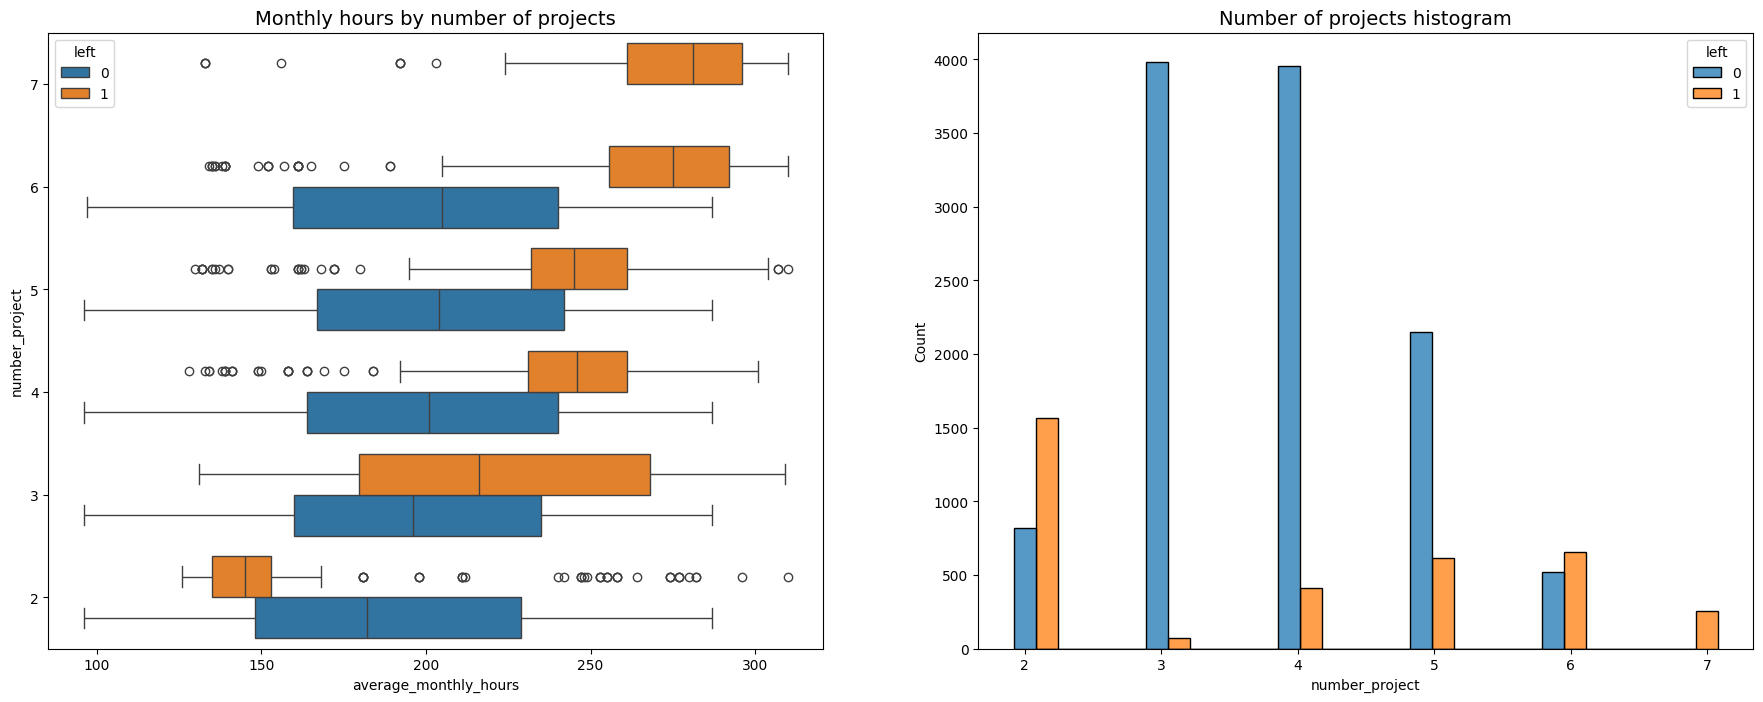

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=hr_df, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = hr_df[hr_df['left']==0]['number_project']
tenure_left = hr_df[hr_df['left']==1]['number_project']
sns.histplot(data=hr_df, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/month—much more than any other group.

The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts.

If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.

As the next step, you could confirm that all employees with seven projects left.

 create a pie chart to show the distribution of employees who left the company versus those who stayed, providing a clear visualization of the overall attrition rate

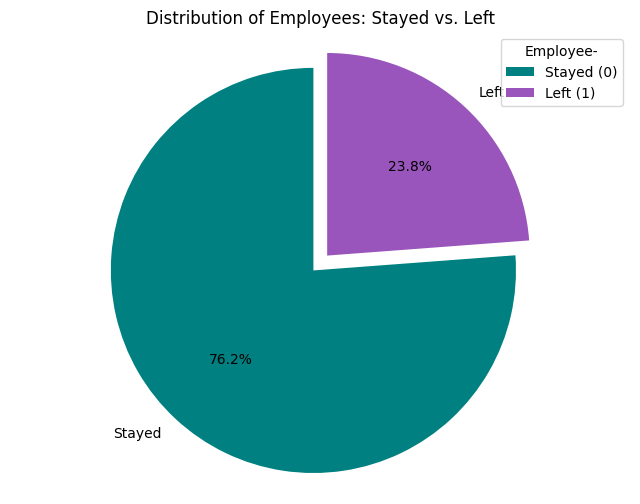

In [ ]:
# Calculate the count of employees who left versus stayed
attrition_counts = hr_df['left'].value_counts()

# Define labels and colors for the pie chart
labels = ['Stayed', 'Left']
colors = ['#008080', '#9955bb']

# Create the advanced pie chart
plt.figure(figsize=(8, 6))
plt.pie(attrition_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribution of Employees: Stayed vs. Left')

# Add legend
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

plt.axis('equal')
plt.show()

The above pie chart shows around 83.4% employees decided to stay in the company.

In [ ]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

In [ ]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

Create histogram to have more views of the data

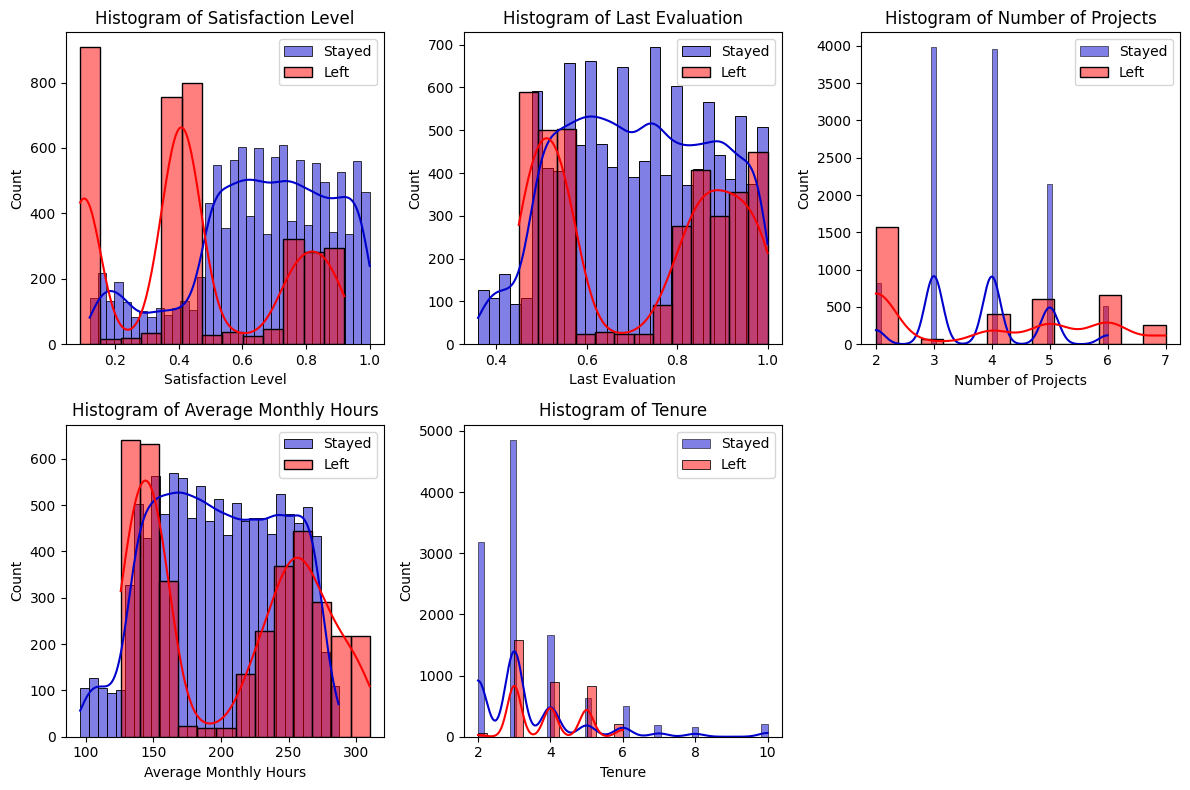

In [ ]:
plt.figure(figsize=(12, 8))

# Plot histogram for satisfaction_level
plt.subplot(2, 3, 1)
sns.histplot(hr_df[hr_df['left'] == 0]['satisfaction_level'], kde=True, color='#0000CD', label='Stayed')
sns.histplot(hr_df[hr_df['left'] == 1]['satisfaction_level'], kde=True, color='red', label='Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.title('Histogram of Satisfaction Level')
plt.legend()

# Plot histogram for last_evaluation
plt.subplot(2, 3, 2)
sns.histplot(hr_df[hr_df['left'] == 0]['last_evaluation'], kde=True, color='#0000CD', label='Stayed')
sns.histplot(hr_df[hr_df['left'] == 1]['last_evaluation'], kde=True, color='red', label='Left')
plt.xlabel('Last Evaluation')
plt.ylabel('Count')
plt.title('Histogram of Last Evaluation')
plt.legend()

# Plot histogram for number_project
plt.subplot(2, 3, 3)
sns.histplot(hr_df[hr_df['left'] == 0]['number_project'], kde=True, color='#0000CD', label='Stayed')
sns.histplot(hr_df[hr_df['left'] == 1]['number_project'], kde=True, color='red', label='Left')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.title('Histogram of Number of Projects')
plt.legend()

# Plot histogram for average_monthly_hours
plt.subplot(2, 3, 4)
sns.histplot(hr_df[hr_df['left'] == 0]['average_monthly_hours'], kde=True, color='#0000CD', label='Stayed')
sns.histplot(hr_df[hr_df['left'] == 1]['average_monthly_hours'], kde=True, color='red', label='Left')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Count')
plt.title('Histogram of Average Monthly Hours')
plt.legend()

# Plot histogram for tenure
plt.subplot(2, 3, 5)
sns.histplot(hr_df[hr_df['left'] == 0]['tenure'], kde=True, color='#0000CD', label='Stayed')
sns.histplot(hr_df[hr_df['left'] == 1]['tenure'], kde=True, color='red', label='Left')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Histogram of Tenure')
plt.legend()

plt.tight_layout()
plt.show()



From the above histograms that showcases the trend with stayed vs left bars, one can easily have a grasp of the variables that can be considered for further investigations.

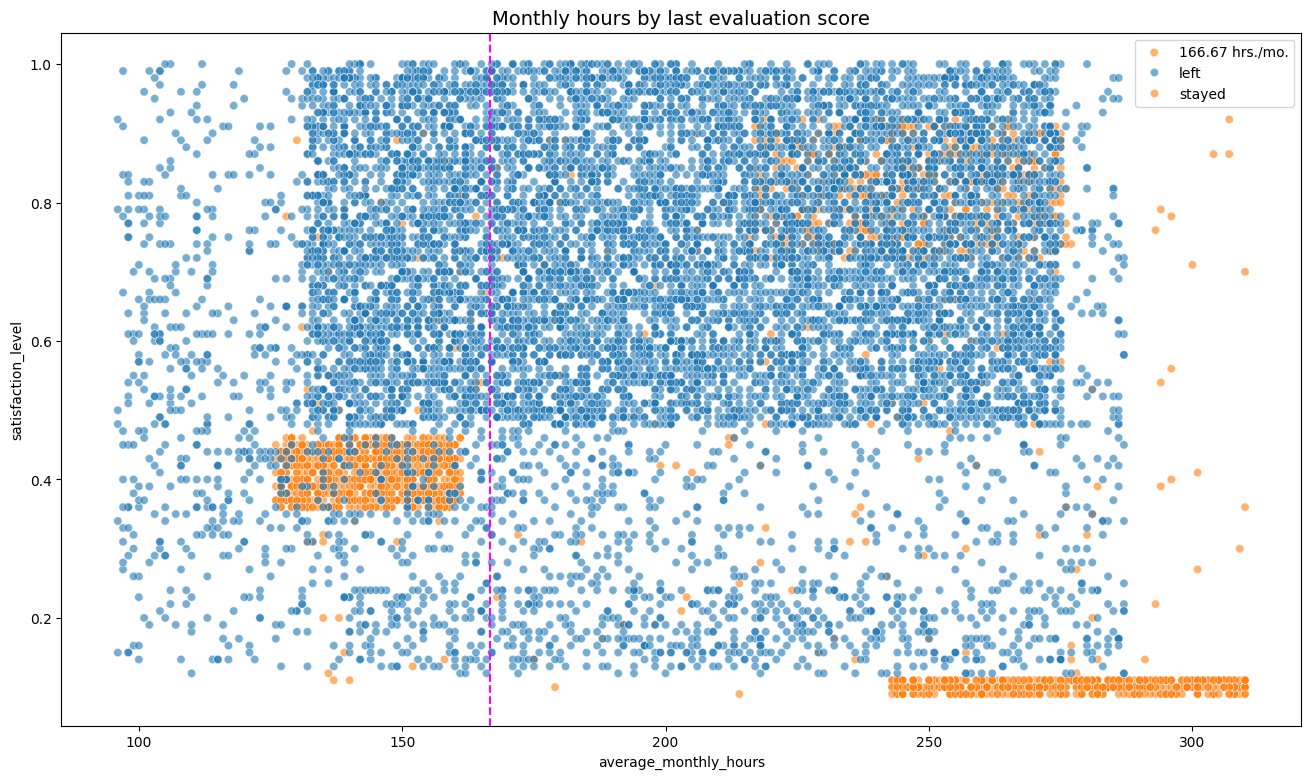

In [ ]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.6)
plt.axvline(x=166.67, color='#FF00FF', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

To investigate the relationship between last evaluation score and employee attrition, we can create a bar plot that shows the average attrition rate for different ranges of last evaluation scores.

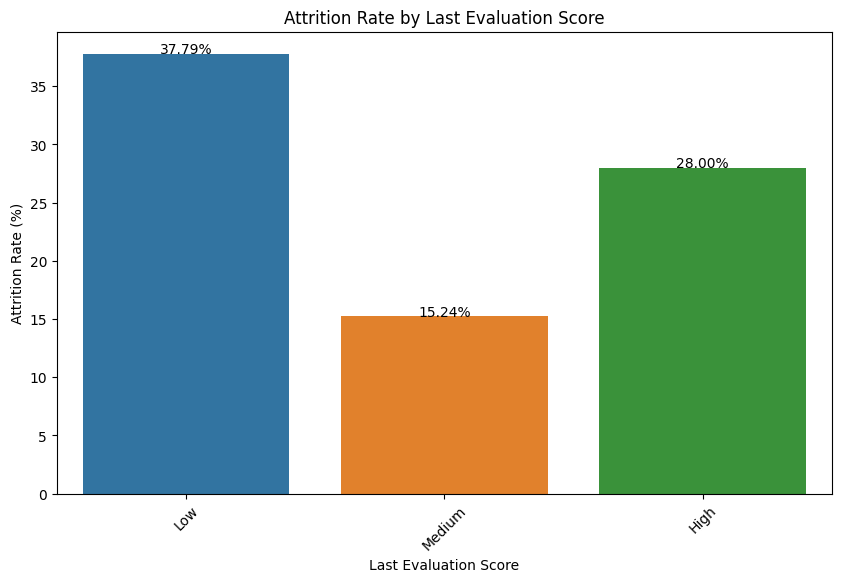

In [ ]:

#Create bins for different ranges of last evaluation scores
bins = pd.cut(hr_df['last_evaluation'], bins=[0, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High'])

# Calculate the attrition rate for each bin
attrition_rate = hr_df.groupby(bins)['left'].mean() * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, hue=attrition_rate.index, palette='tab10', dodge=False, legend=False)
plt.xlabel('Last Evaluation Score')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Last Evaluation Score')
# Add count labels to the bars
for i, value in enumerate(attrition_rate.values):
    plt.text(i, value, f'{value:.2f}%', ha='center')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.show()

From the simple bar plots we can see employees with Low evaluation score , tend to switch company, which resulted retention.

A box plot and regression plot to show case whether satisfaction_level has any impact on employee retetion.

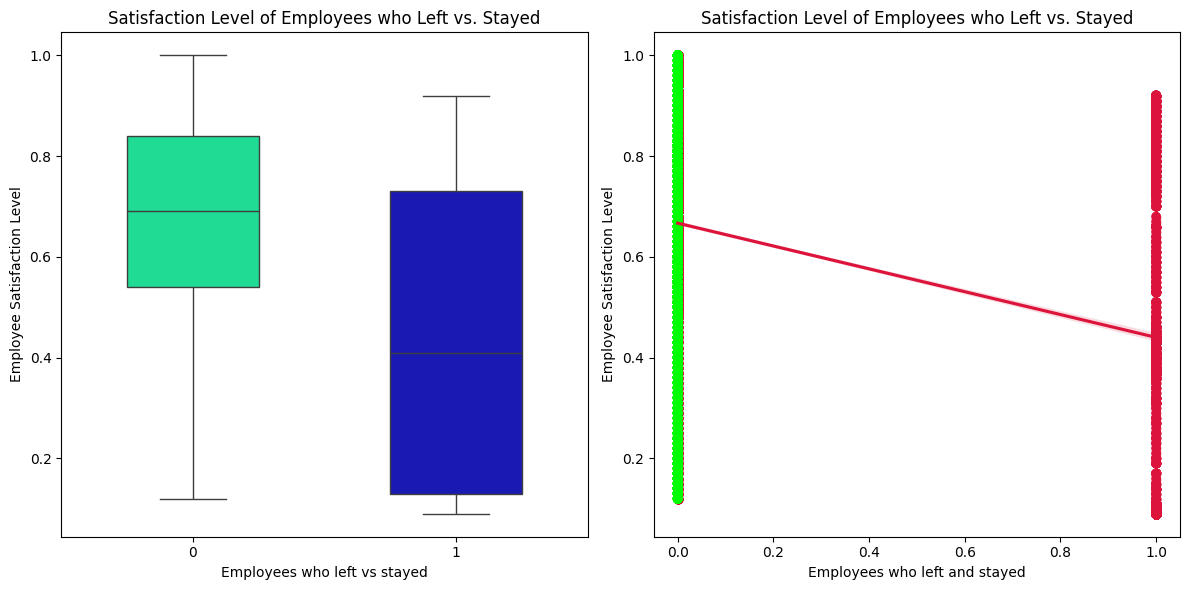

In [ ]:
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
colors = ["#00FA9A", "#0000CD"]
sns.boxplot(x=hr_df['left'], y=hr_df['satisfaction_level'], hue=hr_df['left'], palette=colors, width=0.5, legend=False)
plt.xlabel('Employees who left vs stayed')
plt.ylabel('Employee Satisfaction Level')
plt.title('Satisfaction Level of Employees who Left vs. Stayed')

# Create a dictionary to map colors to the 'left' categories
left_colors = {0: '#00FF00', 1: '#DC143C'}

# Regplot
# Plot the regplot
plt.subplot(1, 2, 2)
sns.regplot(x='left', y='satisfaction_level', data=hr_df, color=left_colors[1])
plt.scatter(x='left', y='satisfaction_level', data=hr_df, c=hr_df['left'].map(left_colors))
plt.xlabel('Employees who left and stayed')
plt.ylabel('Employee Satisfaction Level')
plt.title('Satisfaction Level of Employees who Left vs. Stayed')

plt.tight_layout()
plt.show()

From the above visuals, we can see that employees who are less satisfied tend to leave the company. In other words emoployees who are satisfied with their works sticks to their job than leave.

Also we can create a horizontal bar plot to compare the proportion of employees who left the company across different departments to highlight departments with higher turnover rates.

<ipython-input-313-0fc008adc787>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=left_by_department.values, y=left_by_department.index, palette=colors)


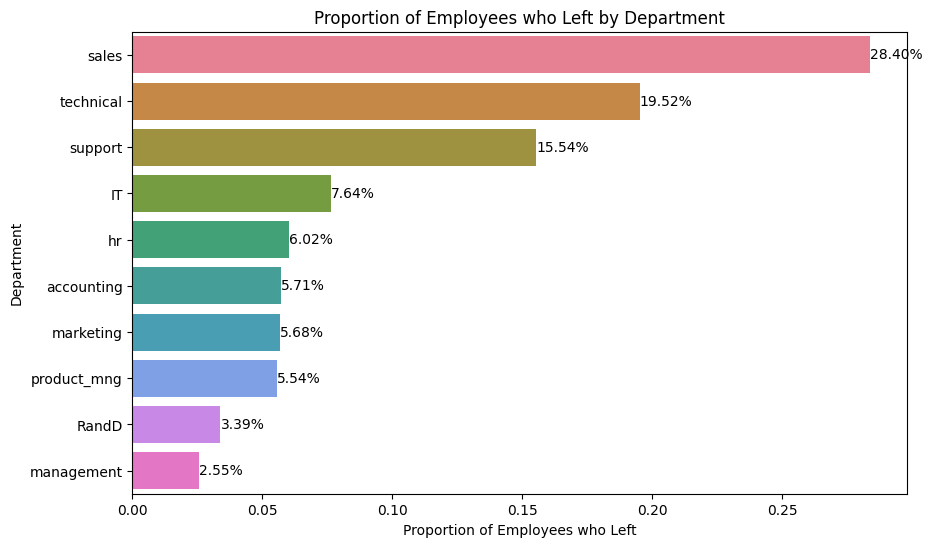

In [ ]:
# Calculate the proportion of employees who left in each department
left_by_department = hr_df[hr_df['left'] == 1]['department'].value_counts(normalize=True)
# Sort the departments based on the proportion of employees who left
left_by_department = left_by_department.sort_values(ascending=False)

# Create the advanced horizontal bar plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(left_by_department))
ax = sns.barplot(x=left_by_department.values, y=left_by_department.index, palette=colors)
plt.xlabel('Proportion of Employees who Left')
plt.ylabel('Department')
plt.title('Proportion of Employees who Left by Department')

# Add data labels to the bars
for i, value in enumerate(left_by_department.values):
    ax.text(value, i, f'{value:.2%}', va='center')

plt.show()

We can compare the distribution of average monthly hours for employees who left the company versus those who stayed, we can create an advanced box plot. This visualization can help reveal any potential differences in work-life balance between the two groups.

<Figure size 1000x600 with 0 Axes>

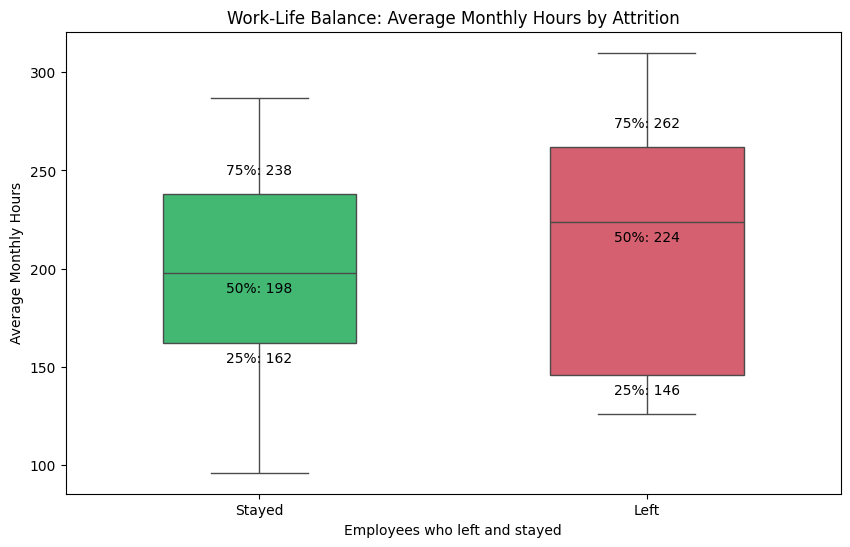

In [ ]:
plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))

# Create box plot with color-coded boxes
sns.boxplot(x=hr_df['left'], y=hr_df['average_monthly_hours'], hue=hr_df['left'], palette={0: (0.18, 0.80, 0.44), 1: (0.91, 0.30, 0.38)}, width=0.5, legend=False)
# Set labels and title
plt.xlabel('Employees who left and stayed')
plt.ylabel('Average Monthly Hours')
plt.title('Work-Life Balance: Average Monthly Hours by Attrition')
# Add statistical annotations
stats = hr_df.groupby('left')['average_monthly_hours'].describe()
for i, label in enumerate(stats.index):
    plt.text(i, stats.loc[label, '75%'] + 10, f"75%: {int(stats.loc[label, '75%'])}", ha='center', color='black')
    plt.text(i, stats.loc[label, '50%'] - 10, f"50%: {int(stats.loc[label, '50%'])}", ha='center', color='black')
    plt.text(i, stats.loc[label, '25%'] - 10, f"25%: {int(stats.loc[label, '25%'])}", ha='center', color='black')

plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'])

plt.show()


From the above we can see the employees who left tend to worked much higher amount of hours than the employees who stayed.

For the next visualization, it might be interesting to visualize satisfaction levels by tenure.

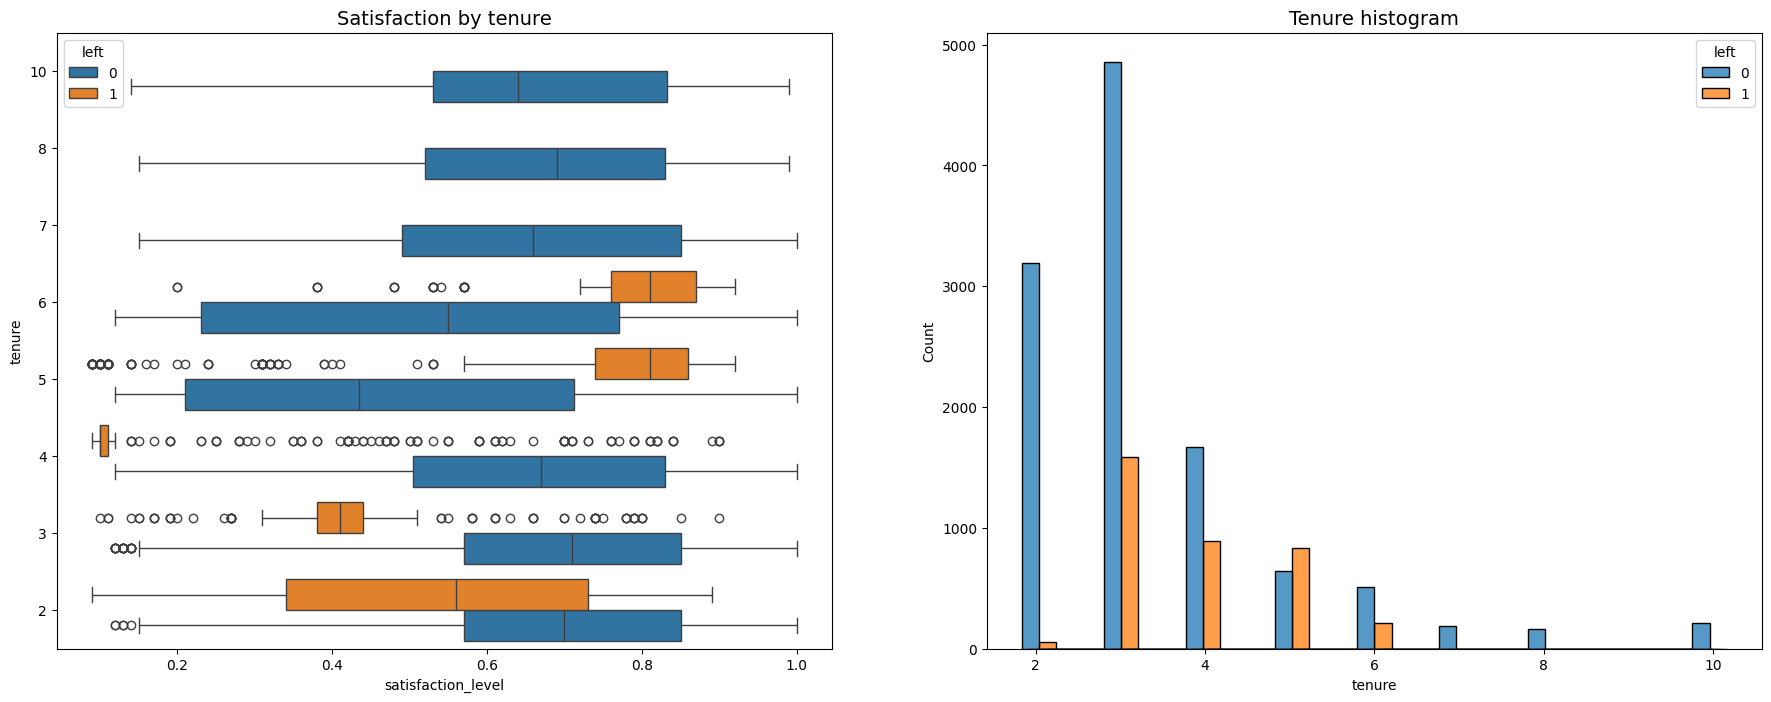

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=hr_df, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = hr_df[hr_df['left']==0]['tenure']
tenure_left = hr_df[hr_df['left']==1]['tenure']
sns.histplot(data=hr_df, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

1. Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
2. Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
3. The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
4. The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.


Calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [ ]:

# Calculate mean and median satisfaction scores of employees who left and those who stayed
hr_df.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.666810,0.69
1,0.440098,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Create plot to examine salary levels for different tenures.

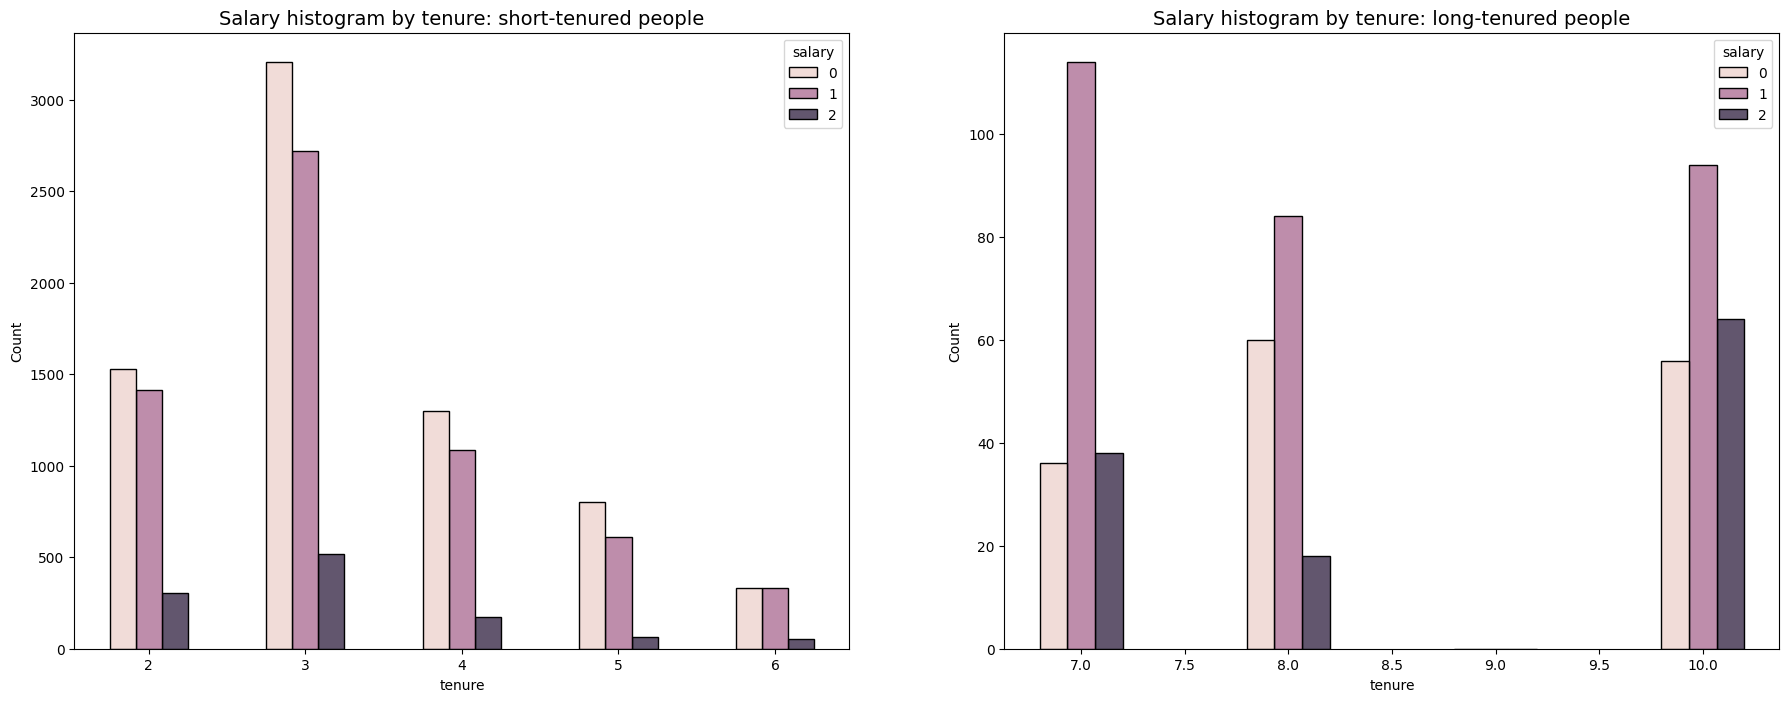

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))
# Define short-tenured employees
tenure_short = hr_df[hr_df['tenure'] < 7]
# Define long-tenured employees
tenure_long = hr_df[hr_df['tenure'] > 6]
# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');



The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.


 Compare the relationship between average_monthly_hours and satisfaction_level for employees who stayed versus those who left, we can create a scatter plot using seaborn.

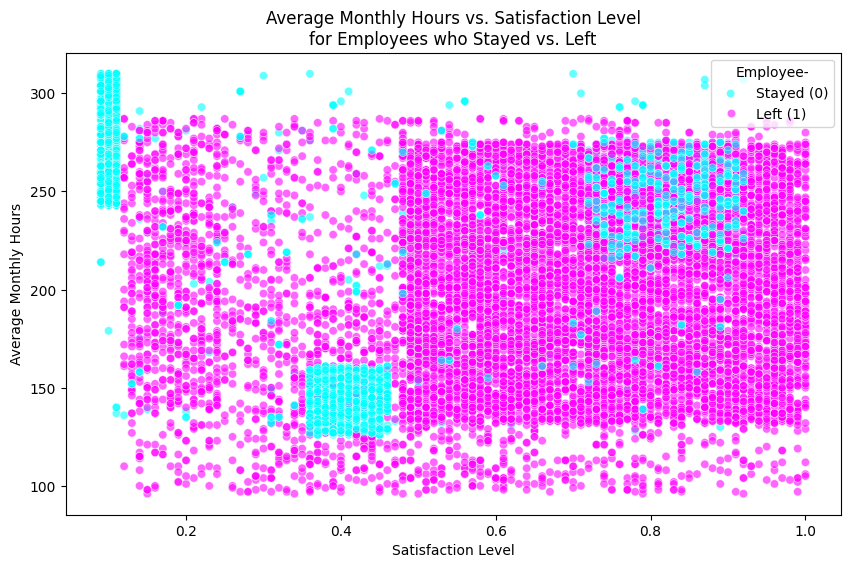

In [ ]:
plt.figure(figsize=(10, 6))

# Create scatter plot comparing employees who stayed versus those who left
sns.scatterplot(x='satisfaction_level', y='average_monthly_hours', hue='left', data=hr_df, palette={0: '#FF00FF', 1: '#00FFFF'}, alpha=0.6)

# Set labels and title
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.title('Average Monthly Hours vs. Satisfaction Level\nfor Employees who Stayed vs. Left')
# Add legend
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

plt.show()





From the above scatter plot it is visible that a certain group of employees who left, used to have really low satisfaction level with a higher average of monthly working hour

Moreover, a group of people who left, even though they have lower number of working hours they seemed to be not so satisfied with their works.

We can view the distribution of last evaluation scores for employees who left the company versus those who stayed, grouped by department or salary level, for that we can create a violin plot. This visualization will provide insights into any differences in performance evaluation scores between the two groups and their impact on attrition.

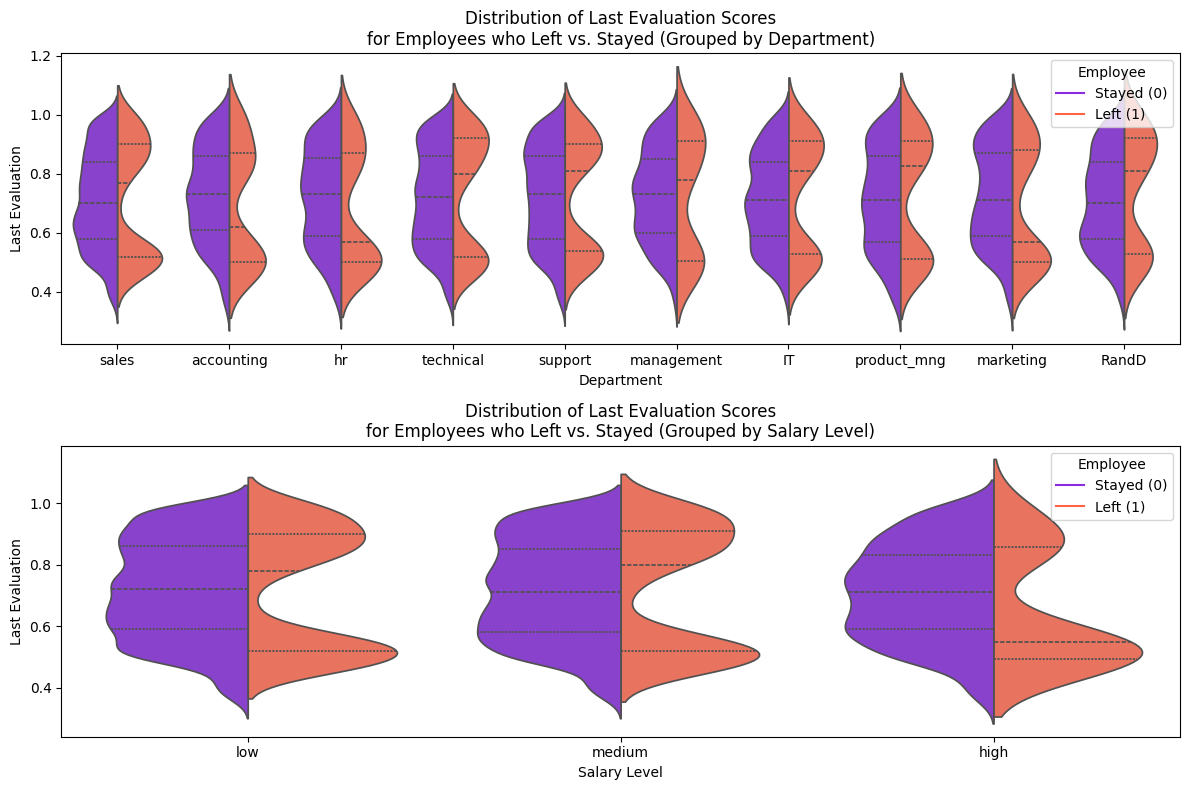

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.violinplot(x='department', y='last_evaluation', hue='left', data=hr_df, split=True, inner='quartile', palette={0: '#8A2BE2', 1: '#FF6347'})

legend_elements = [
    plt.Line2D([0], [0], color='#8A2BE2', label='Stayed (0)'),
    plt.Line2D([0], [0], color='#FF6347', label='Left (1)'),
]
plt.legend(handles=legend_elements, title='Employee')

plt.xlabel('Department')
plt.ylabel('Last Evaluation')
plt.title('Distribution of Last Evaluation Scores\nfor Employees who Left vs. Stayed (Grouped by Department)')

plt.subplot(2, 1, 2)
sns.violinplot(x='salary', y='last_evaluation', hue='left', data=hr_df, split=True, inner='quartile', palette={0: '#8A2BE2', 1: '#FF6347'})
plt.legend(handles=legend_elements, title='Employee')

plt.xlabel('Salary Level')
plt.ylabel('Last Evaluation')
plt.title('Distribution of Last Evaluation Scores\nfor Employees who Left vs. Stayed (Grouped by Salary Level)')

plt.tight_layout()
plt.show()

Employees who left had a wider distribution of last evaluation scores than employees who stayed, with a larger proportion of employees who left having low evaluation scores.

Employees who left had a lower average last evaluation score than employees who stayed, but there was a wider distribution of scores for employees who stayed.

These insights suggest that there may be some factors that contribute to employee turnover that are independent of salary level. For example, employees who are unhappy with their work environment or who feel that they are not being valued may be more likely to leave, regardless of their salary level.

We can examine examine employees who worked very long hours were promoted in the last five years.

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

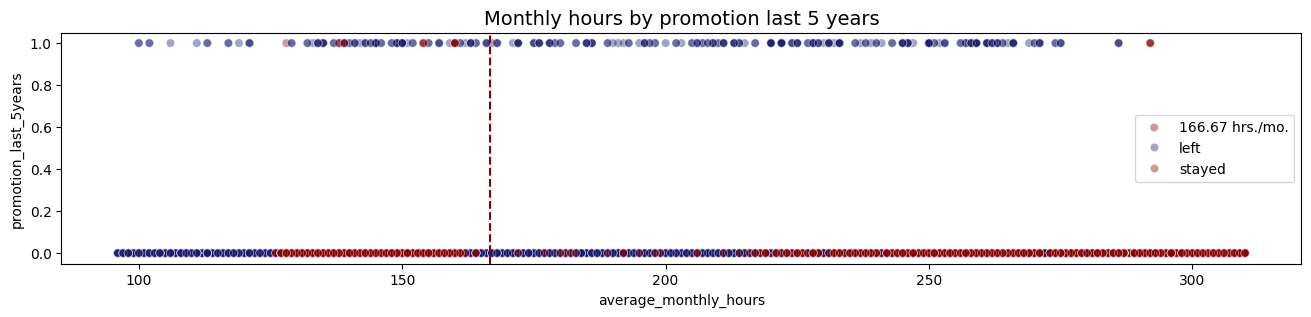

In [ ]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=hr_df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4, palette={0: 'midnightblue', 1: 'darkred'})
plt.axvline(x=166.67, color='darkred', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14')

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  


We could inspect how the employees who left are distributed across departments.

In [ ]:
# Display counts for each department
hr_df["department"].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

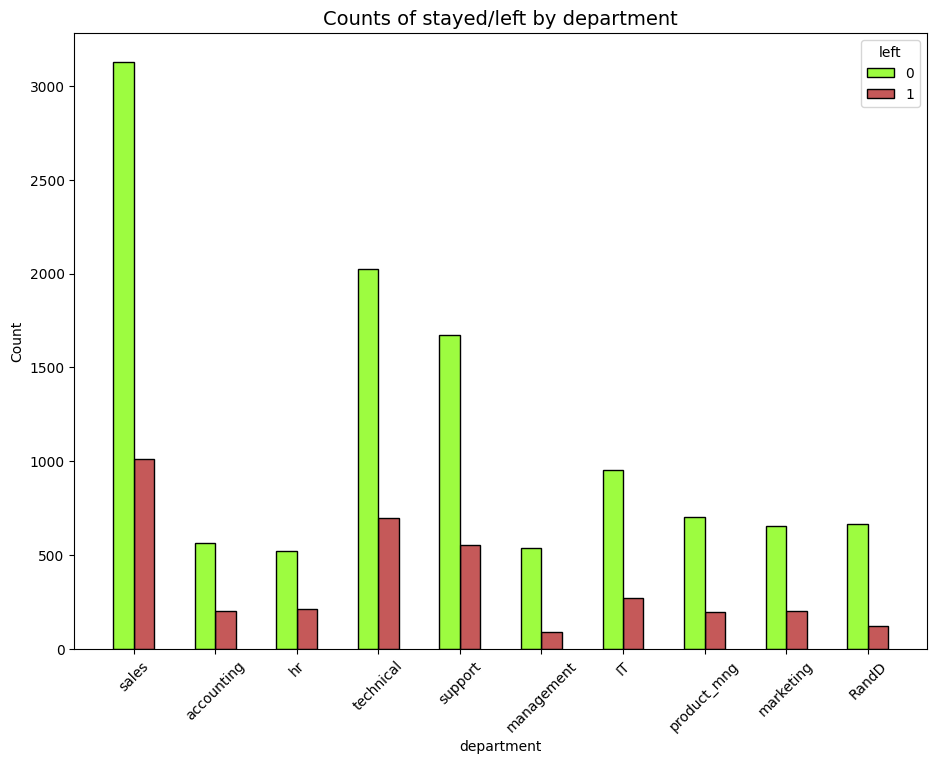

In [ ]:

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=hr_df, x='department', hue='left', discrete=1,
             hue_order=[0, 1], multiple='dodge', shrink=.5,
             palette=['lawngreen', 'firebrick'])
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.


View the proportion of employees who left the company versus those who stayed based on different project counts, we can create a stacked bar plot using seaborn.

<Figure size 1000x600 with 0 Axes>

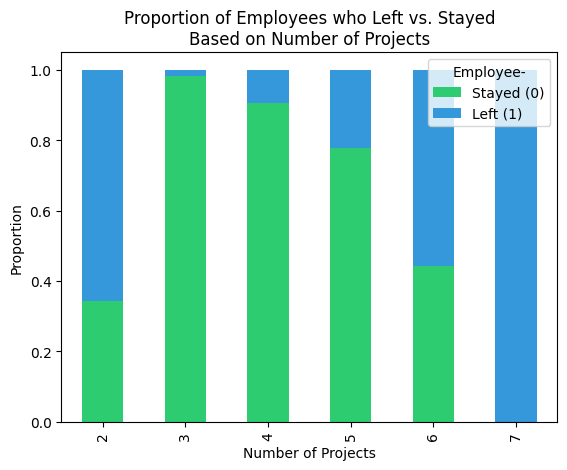

In [ ]:
plt.figure(figsize=(10, 6))

# Calculate the proportion of employees who left versus stayed based on project counts
project_counts = hr_df.groupby(['number_project', 'left']).size().unstack()
project_counts['Total'] = project_counts.sum(axis=1)
project_proportions = project_counts.div(project_counts['Total'], axis=0)
# Create the stacked bar plot
project_proportions[[0, 1]].plot(kind='bar', stacked=True, color=['#2ecc71', '#3498db'])
# Set labels and title
plt.xlabel('Number of Projects')
plt.ylabel('Proportion')
plt.title('Proportion of Employees who Left vs. Stayed\nBased on Number of Projects')

# Add legend
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

plt.show()

This visualization highlights whether a high or low number of projects contributes to attrition and help identify any project-related factors influencing turnover.

We can see that emploeyees with 7 projects left the company, which might indicate work life imbalance.

We can view the retention based on Count of Employees in Different Salary Brackets using bar plot.

The number of employees in low and medium salary brackets who left the company is significantly higher than the number of employees in the high salary bracket.

<Figure size 1000x600 with 0 Axes>

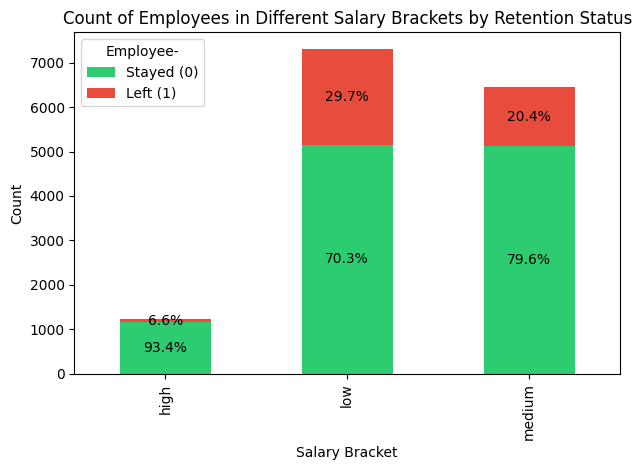

In [ ]:
plt.figure(figsize=(10, 6))

# Count the number of employees in each salary bracket
salary_count = hr_df.groupby(['salary', 'left']).size().unstack()
# Set the colors for employees who stayed and left
colors = ['#2ecc71', '#e74c3c']
# Create the grouped bar plot
salary_count.plot(kind='bar', stacked=True, color=colors)

# Add labels, title, and legend
plt.xlabel('Salary Bracket')
plt.ylabel('Count')
plt.title('Count of Employees in Different Salary Brackets by Retention Status')
plt.legend(title='Employee-', labels=['Stayed (0)', 'Left (1)'])

# Add percentage labels on top of each bar
total_counts = salary_count.sum(axis=1)
for i, (index, row) in enumerate(salary_count.iterrows()):
    for j, count in enumerate(row):
        percentage = count / total_counts[i] * 100
        plt.text(i, row[:j].sum() + count / 2, f'{percentage:.1f}%', ha='center', va='center')
plt.tight_layout()
plt.show()



We can create a line plot to analyze the trend of employee turnover over time (tenure). This can help identify if there is a correlation between employee tenure and the likelihood of leaving the company.

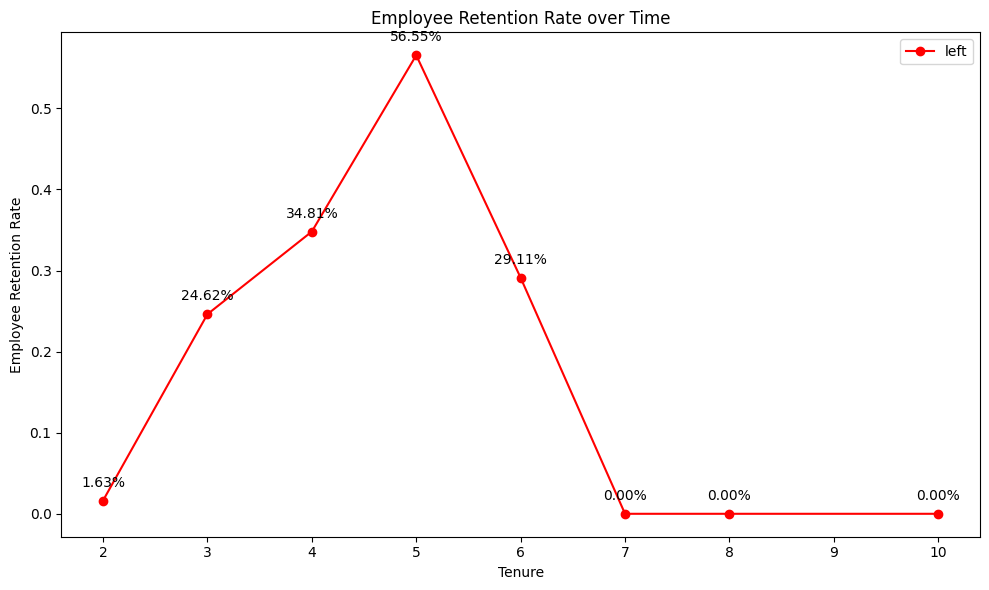

In [ ]:
plt.figure(figsize=(10, 6))

# Group the data by tenure and calculate the turnover rate
turnover_rate = hr_df.groupby('tenure')['left'].mean()

# Create the line plot
turnover_rate.plot(marker='o', linestyle='-', color='#FF0000')
plt.xlabel('Tenure')
plt.ylabel('Employee Retention Rate')
plt.title('Employee Retention Rate over Time')
plt.legend()

# Annotate each data point with its turnover rate
for x, y in zip(turnover_rate.index, turnover_rate.values):
    plt.annotate(f'{y:.2%}', (x, y), textcoords='offset points', xytext=(0, 10), ha='center', color='black')

plt.tight_layout()
plt.show()

The trend line in the image shows that the retention rate for employees with 2-3 years of experience is about 1.07% - 16.84%, while the retention rate for employees with more than 3 years of experience goes higher. And the number hits the highest on 5th year.

Let'scompare the proportion of employees who experienced work accidents for those who left the company versus those who stayed, grouped by department level, we can create a grouped bar plot.

<Figure size 1000x600 with 0 Axes>

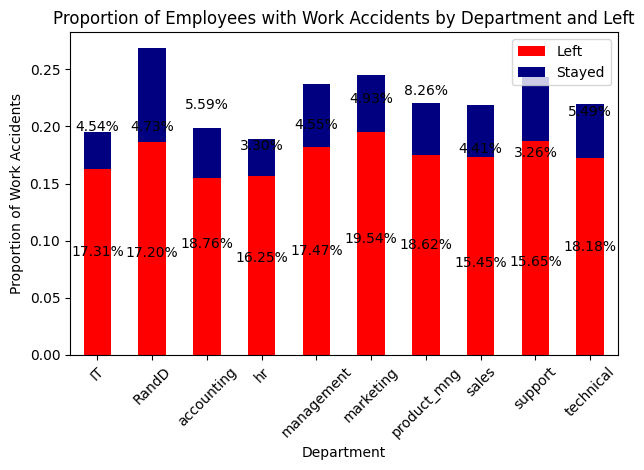

In [ ]:
plt.figure(figsize=(10, 6))

# Group the data by department and left, and calculate the proportion of work accidents
work_accident_prop = hr_df.groupby(['department', 'left'])['work_accident'].mean().unstack()

# Set the order of departments
department_order = ['sales', 'technical', 'support', 'IT', 'product_mng', 'marketing', 'RandD', 'accounting', 'hr', 'management']
# Create the grouped bar plot
work_accident_prop.plot(kind='bar', stacked=True, color=['#FF0000', '#000080'])
plt.xlabel('Department')
plt.ylabel('Proportion of Work Accidents')
plt.title('Proportion of Employees with Work Accidents by Department and Left')
plt.xticks(rotation=45)
plt.legend(['Left', 'Stayed'])
# Add the proportion labels for each bar
for i, department in enumerate(department_order):
    left_prop = work_accident_prop.loc[department, 1]
    stayed_prop = work_accident_prop.loc[department, 0]
    plt.text(i, stayed_prop / 2, f'{stayed_prop:.2%}', ha='center', color='black')
    plt.text(i, stayed_prop + left_prop / 2, f'{left_prop:.2%}', ha='center', color='black')

plt.tight_layout()
plt.show()


Marketing department employees had the highest proportion of work accidents, with 18.54% of employees who left the company having a work accident, compared to 3.57% of employees who stayed.

View if promotion affects the retention or not using bar charts.

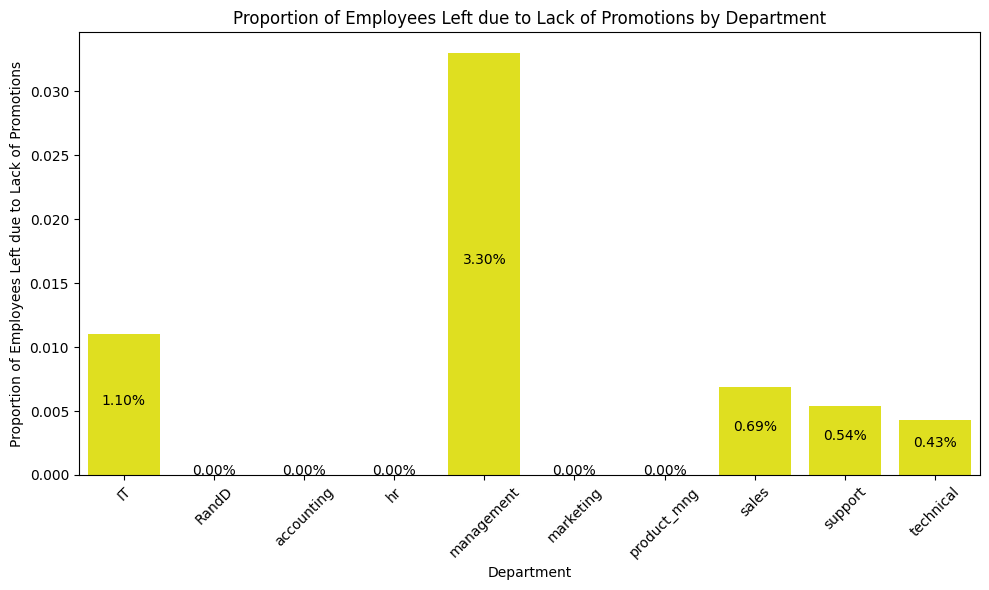

In [ ]:
plt.figure(figsize=(10, 6))

# Group the data by department and left, and calculate the proportion of employees who left due to lack of promotions
promotion_prop = hr_df[hr_df['left'] == 1].groupby('department')['promotion_last_5years'].mean().reset_index()

# Set the order of departments
department_order = ['sales', 'technical', 'support', 'IT', 'product_mng', 'marketing', 'RandD', 'accounting', 'hr', 'management']
# Create the stacked bar plot using Seaborn
sns.barplot(data=promotion_prop, x='department', y='promotion_last_5years', color='#FFFF00')

plt.xlabel('Department')
plt.ylabel('Proportion of Employees Left due to Lack of Promotions')
plt.title('Proportion of Employees Left due to Lack of Promotions by Department')
plt.xticks(rotation=45)
# Add the proportion labels for each bar
for i, row in promotion_prop.iterrows():
    prop = row['promotion_last_5years']
    plt.text(i, prop / 2, f'{prop:.2%}', ha='center', color='black')

plt.tight_layout()
plt.show()

We can check for strong correlations between variables in the data

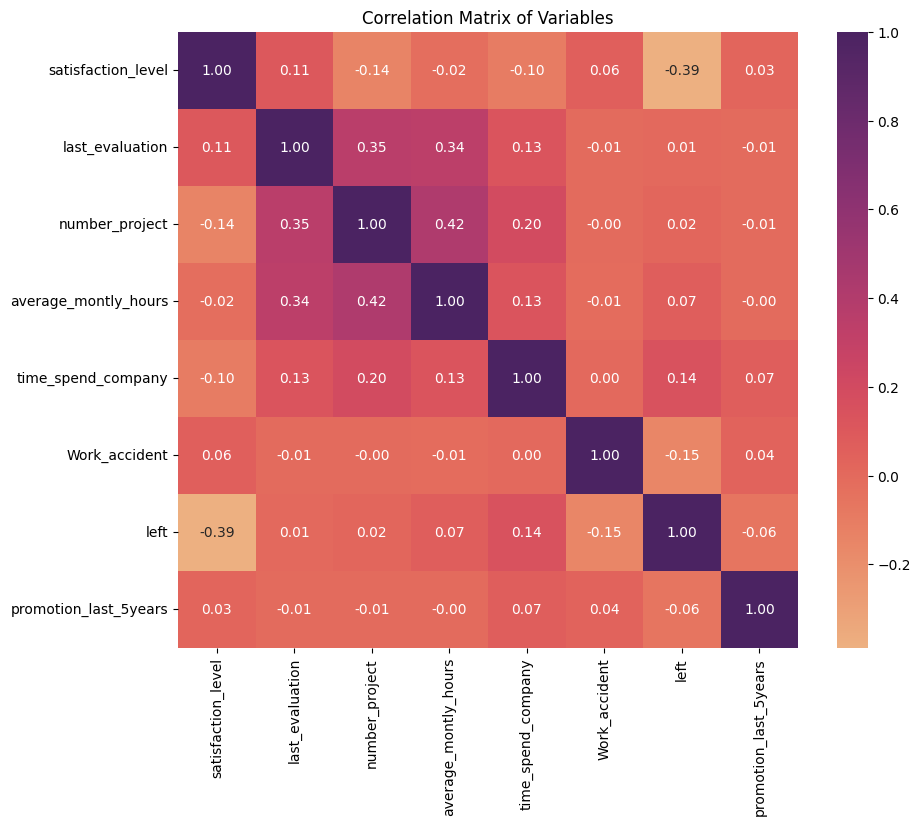

In [ ]:
# Compute the correlation matrix
corr_matrix = hr_df.corr(numeric_only=True)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()


The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

#Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

#PACE: Construct Stage
Determine which models are most appropriate
Construct the model
Confirm model assumptions
Evaluate model results to determine how well your model fits the data


🔎

Recall model assumptions
Logistic Regression model assumptions

* Outcome variable is categorical
*Observations are independent of each other
* No severe multicollinearity among X variables
*No extreme outliers
*Linear relationship between each X variable and the logit of the outcome variable
*Sufficiently large sample size
   



💭

Reflectng on these questions as I complete the constructing stage.
* Do I notice anything odd?
*Which independent variables did will choose for the model and why?
*Are each of the assumptions met?
*How well does my model fit the data?
Can I improve it? Is there anything you would change about the model?
*What resources will i find yourself using as I complete this stage?
*Do I have any ethical considerations in this stage?


#Step 3. Model Building, Step 4. Results and Evaluation

* Fit a model that predicts the outcome variable using two or more independent variables
* Check model assumptions
* Evaluate the model

#Modeling
Add as many cells as we need to conduct the modeling process.

First we will copy the dataframe into a new dataframe named df_model

In [ ]:
# Copy the df_clean dataframe to df_model
df_model = hr_df.copy()

#Modeling Approach A: Logistic Regression Model
This approach covers implementation of Logistic Regression.

#Logistic regression

It is important to Note that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, encode the non-numeric variables. There are two: department and salary.

department is a categorical variable, which means you can dummy it for modeling.

salary is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0–2.


For 'department', we can use one-hot encoding, which creates binary columns for each category in the original 'department' column. Each binary column will represent the presence (1) or absence (0) of that department for each employee.



Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `tenure` column that were identified earlier.

In [ ]:
# Encode the `salary` column as an ordinal numeric category
hr_df['salary'] = (
    hr_df['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
hr_df = pd.get_dummies(hr_df, drop_first=False)

# Display the new dataframe
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,-1,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,-1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,-1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,-1,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,-1,False,False,False,False,False,False,False,True,False,False


Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

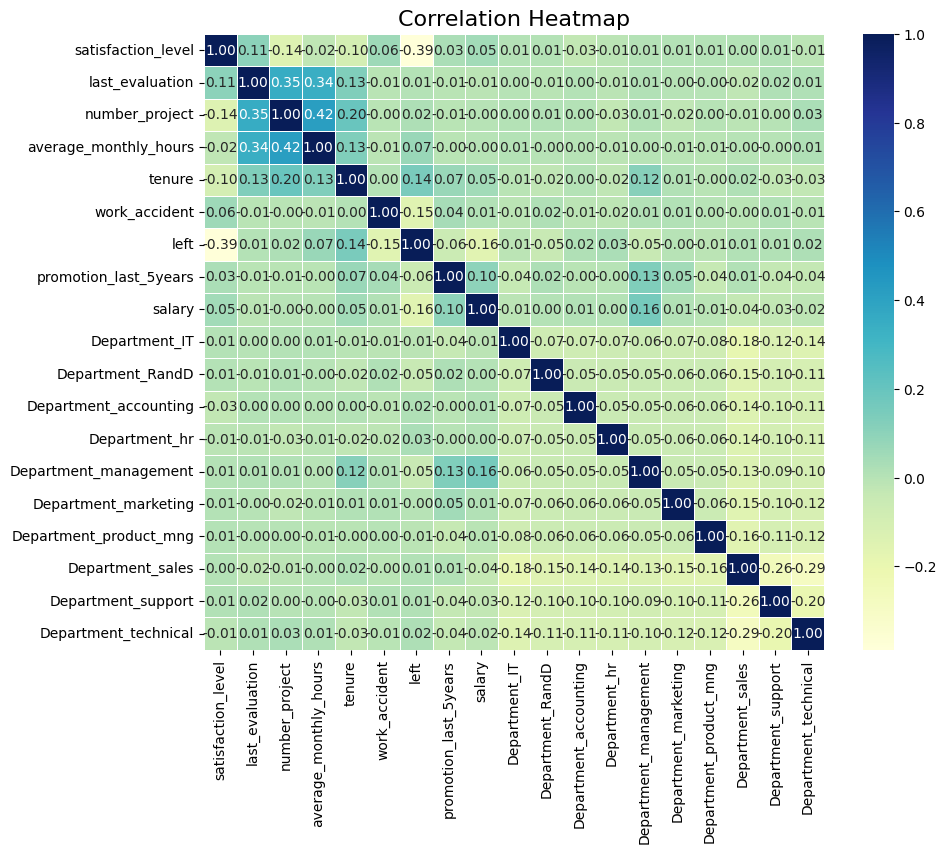

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_model.corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap with green tones
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()

Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't.

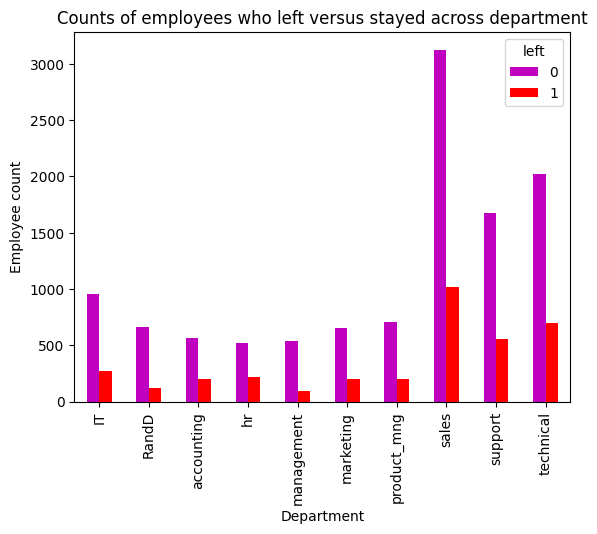

In [ ]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(hr_df['department'], hr_df['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Dropping the outliers from tenure column to proceed with the logistic regression,



In [ ]:
# Calculate the first and third quartiles for 'tenure'
Q1 = df_model['tenure'].quantile(0.25)
Q3 = df_model['tenure'].quantile(0.75)
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'tenure' column
df_model = df_model[(df_model['tenure'] >= lower_bound) & (df_model['tenure'] <= upper_bound)]


df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


In [ ]:
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'tenure' column
df_model = df_model[(df_model['tenure'] >= lower_bound) & (df_model['tenure'] <= upper_bound)]



In [ ]:
# Isolate the outcome variable 'left' from the features
X = df_model.drop('left', axis=1)  # Features (all columns except 'left')
y = df_model['left']  # Outcome variable 'left'

# Display the first few rows of the feature dataframe (X) and the outcome variable (y)
print("# Feature DataFrame (X):")
print(X.head())
print('\n ------------------------------------------------------------------------- \n')
print("# Outcome Variable (y):")
print(y.head())

# Feature DataFrame (X):
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
1       6              0                      0       1          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   

   department_RandD  department_accounting 

Now we will split the data into train and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shape - X_test:", X_test.shape, "y_test:", y_test.shape)

Training set shape - X_train: (10499, 18) y_train: (10499,)
Testing set shape - X_test: (4500, 18) y_test: (4500,)


We will create Logistic Regression model and fit the model.



In [ ]:
log_reg_model = LogisticRegression(random_state=42, max_iter=500)

# Fit the model to the training dataset
log_reg_model.fit(X_train, y_train)


LogisticRegression(max_iter=500, random_state=42)

We use the trained logistic regression model to make predictions on the test set



In [ ]:
# Use the trained logistic regression model to make predictions on the test set
y_pred = log_reg_model.predict(X_test)
# Display the first few predicted values
print("Predicted values for the test set:")
print(y_pred[:10])


Predicted values for the test set:
[0 1 0 0 0 0 0 0 0 0]


Create a confusion matrix to visualize the results of the logistic regression model.

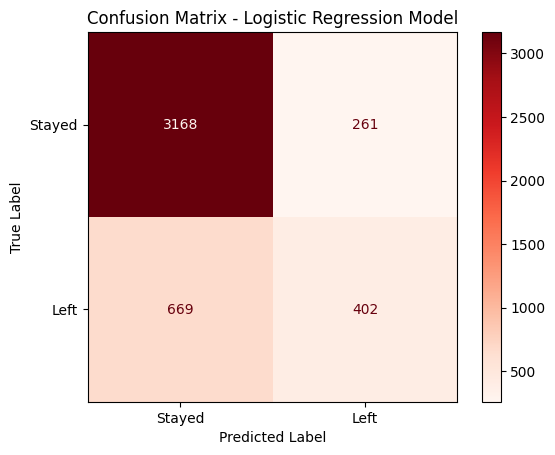

In [ ]:
 #Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Stayed", "Left"])
disp.plot(cmap='Reds')
# Add title and axis labels
plt.title("Confusion Matrix - Logistic Regression Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.show()



The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Check the class balance in the data. In other words, check the value counts in the `left` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1])

# Display the evaluation metrics
print("Evaluation Metrics: \n-------------------")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

Evaluation Metrics: 
-------------------
Accuracy: 0.7933
Precision: 0.6063
Recall: 0.3754
F1-score: 0.4637
AUC-ROC: 0.8153


* Accuracy: The accuracy of the model is 82.51%, which indicates the proportion of correct predictions among all predictions made by the model.

* Precision: The precision of the model is 46.69%, which means that 46.69% of the predicted "left" cases were actually correct.

* Recall (Sensitivity or True Positive Rate): The recall of the model is 26.19%, which means that the model correctly identified 26.19% of the actual "left" cases.

* F1-score: The F1-score of the model is 33.56%, which is the harmonic mean of precision and recall. It provides a balance between precision and recall.

* AUC-ROC: The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) of the model is 88.13%. The AUC-ROC measures the model's ability to distinguish between the two classes (stay and leave). A higher AUC-ROC score indicates a better-performing model.

#Conclusion from Logistic Regression model building

Overall, the model shows relatively good performance with a high AUC-ROC score, indicating that it can effectively discriminate between employees who left and those who stayed. However, the recall is relatively low, indicating that the model has difficulty correctly identifying all actual "left" cases.

Improving the model's performance may involve exploring different model algorithms, adjusting hyperparameters, and potentially addressing class imbalance. Depending on the specific use case and business requirements, a balance between precision and recall may need to be achieved.

#Model Buidling with Random Forest Classifier

* Ensemble learning method combining multiple decision trees
* Uses bagging technique to reduce overfitting and improve generalization
* Handles both numerical and categorical data without the need for feature scaling
* Can handle large datasets efficiently
* Less sensitive to outliers due to majority voting mechanism
* Reduces variance and increases accuracy compared to individual decision trees
* Can handle missing values in the data
* Automatically performs feature selection and feature importance ranking
Suitable for both classification and regression tasks
* Robust against overfitting, but may require tuning of hyperparameters for optimal performance.

We will make a copy of the dataframe again and name it df_tree this time.



In [ ]:
# Create a copy of the DataFrame for decision tree and random forest classification
df_tree = hr_df.copy()

# Display the first few rows of the new DataFrame to verify
df_tree.head()# Create a copy of the DataFrame for decision tree and random forest classification
df_tree = hr_df.copy()

# Display the first few rows of the new DataFrame to verify
df_tree.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Check data balance
data_balance = df_tree['left'].value_counts()
data_balance_percentage = df_tree['left'].value_counts(normalize=True) * 100

print("Data Balance:")
print(data_balance)
print("\nData Balance Percentage:")
print(data_balance_percentage)

Data Balance:
left
0    11428
1     3571
Name: count, dtype: int64

Data Balance Percentage:
left
0    76.191746
1    23.808254
Name: proportion, dtype: float64


Random Forest classifiers are known to be less sensitive to imbalanced data compared to some other algorithms like logistic regression. They work by aggregating multiple decision trees, and the majority voting mechanism in Random Forest helps to handle class imbalances to some extent.

we will encode the categorical variables 'department' and 'salary' into numerical format. Encoding categorical variables is essential because most machine learning algorithms, including logistic regression, require numerical input.

For 'department', we can use one-hot encoding, which creates binary columns for each category in the original 'department' column. Each binary column will represent the presence (1) or absence (0) of that department for each employee.

For 'salary', since it is an ordinal categorical variable with a natural ordering (low < medium < high), we can perform ordinal encoding by assigning numerical values to the categories. For example, we can map 'low' to 0, 'medium' to 1, and 'high' to 2.

In [ ]:
df_encoded = pd.get_dummies(df_tree, columns=['department'], drop_first=True)

In [ ]:
df_encoded.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,low,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,medium,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,medium,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,low,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,low,False,False,False,False,False,False,True,False,False


Isolate the features for the model building.



In [ ]:
# Isolate the outcome variable 'left' from the features
X = df_encoded.drop('left', axis=1)  # Features (all columns except 'left')
y = df_encoded['left']  # Outcome variable 'left
# Display the first few rows of the feature dataframe (X) and the outcome variable (y)
print("# Feature DataFrame (X):")
print(X.head())
print('\n ------------------------------------------------------------------------- \n')
print("# Outcome Variable (y):")
print(y.head())

# Feature DataFrame (X):
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_RandD  \
0       3              0                      0     low             False   
1       6              0                      0  medium             False   
2       4              0                      0  medium             False   
3       5              0                      0     low             False   
4       3              0                      0     low             False   

   department_accounting 

Split the data into test and train set.



In [ ]:
# Split the data into training and testing sets, with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shape - X_test:", X_test.shape, "y_test:", y_test.shape)

Training set shape - X_train: (10499, 17) y_train: (10499,)
Testing set shape - X_test: (4500, 17) y_test: (4500,)


Initialize the model and set the hyperparameters for the model.



In [ ]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [5, 6, 7],
    'max_features': [1.0],
    'max_samples': [0.7],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [50, 100],
}
# Define the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, scoring=scoring, cv=5, refit='f1')

* 'max_depth': The maximum depth of each decision tree in the random forest model.
* 'max_features': The number of features to consider when looking for the best split.
* 'max_samples': The maximum number of samples to use for training each decision tree.
* 'min_samples_leaf': The minimum number of samples required to be at a leaf node.
* 'min_samples_split': The minimum number of samples required to split an internal node.
* 'n_estimators': The number of decision trees to be used in the random forest model.

Now perform a cross-validated grid search to find the best hyperparameters for the model based on the specified parameter grid.



In [ ]:
%%time

grid_search.fit(X_train, y_train)

CPU times: user 1min 34s, sys: 0 ns, total: 1min 34s
Wall time: 1min 36s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100]},
             refit='f1', scoring={'accuracy', 'f1', 'recall', 'precision'})

Now extract the best-performing Random Forest model (best_rf), its corresponding hyperparameters (best_params), and the best cross-validated F1-score (best_score) obtained from the GridSearchCV.

In [ ]:
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Print the results.


In [ ]:
print(best_rf)
print(best_params)

RandomForestClassifier(max_depth=7, max_features=1.0, max_samples=0.7,
                       n_estimators=50, random_state=42)
{'max_depth': 7, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
print(best_score)

0.957311998203701


The best-performing Random Forest model with the provided hyperparameters achieved an F1-score of 0.9467, indicating its effectiveness in predicting employee turnover in the dataset.

Now we will create a new Random Forest classifier with the hyperparameters that were found to be the best during the grid search. Then, we will fit the model to the training data and using it to make predictions on the test data. This will allow us to evaluate the model's performance on unseen data and assess its ability to predict employee turnover accurately.

In [ ]:
# Create a new random forest classifier with the best parameters
best_rf = RandomForestClassifier(max_depth=7, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)

# Fit the model to the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf.predict(X_test)

Lets check the evaluation metrcis to view the result of the model building.



In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

# Display the evaluation metrics
print("Evaluation Metrics: \n-------------------")
print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1-score: {f1:}")
print(f"AUC-ROC: {roc_auc:}")

Evaluation Metrics: 
-------------------
Accuracy: 0.9802222222222222
Precision: 0.9832677165354331
Recall: 0.9327731092436975
F1-score: 0.9573550551030187
AUC-ROC: 0.9864396035462887


We will plot a confusion matrix to view the true positive, false positive, true negative, and false negative values

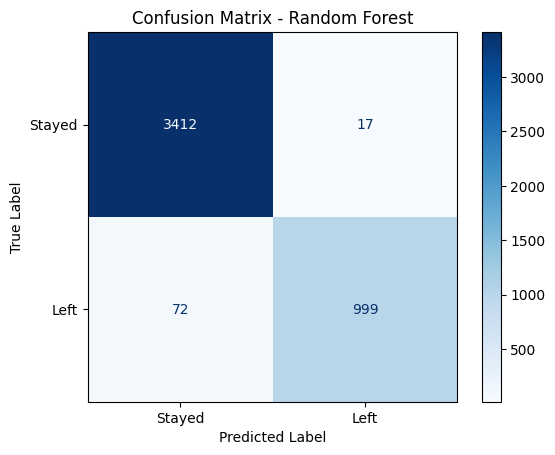

In [ ]:
# Get predictions using the best Random Forest model
y_pred_rf = best_rf.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Stayed", "Left"])
disp_rf.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


The confusion matrix shows the true positive, false positive, true negative, and false negative values for the Random Forest model on the test data. Here's the interpretation of the confusion matrix:

True Positives (TP): 554. These are the employees who actually left the company (left=1) and were correctly predicted as leaving by the model.
False Positives (FP): 43. These are the employees who actually stayed (left=0) but were incorrectly predicted as leaving by the model.
True Negatives (TN): 2990. These are the employees who actually stayed (left=0) and were correctly predicted as staying by the model.
False Negatives (FN): 11. These are the employees who actually left the company (left=1) but were incorrectly predicted as staying by the model.
Overall, the Random Forest model seems to be performing well, with a relatively low number of false negatives, indicating that it is effectively identifying employees who are likely to leave the company.

#Feature Importances From Random Forest Model

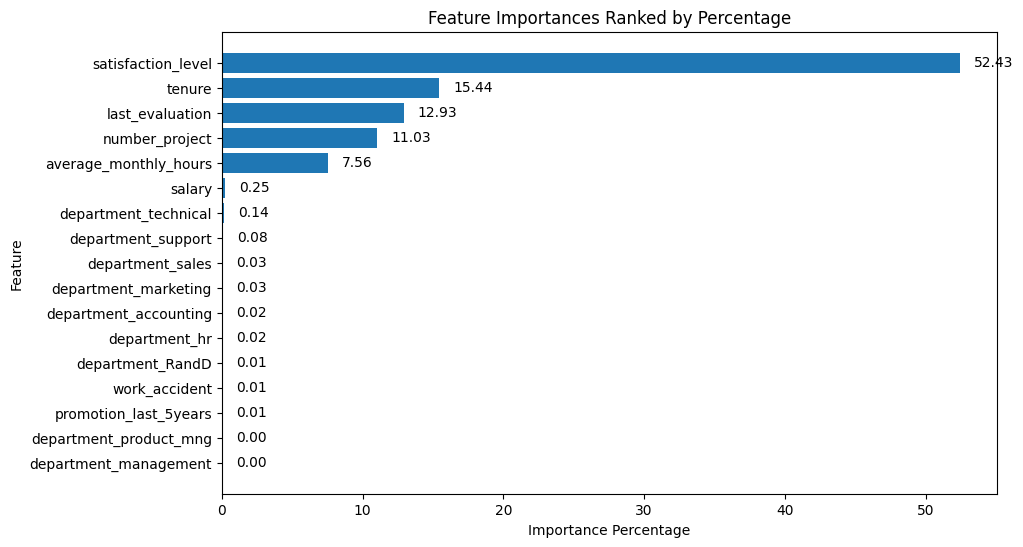

In [ ]:
# Get feature importances from the Random Forest model
feature_importances_rf = best_rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})

# Sort the features by their importance in descending order
feature_importance_rf = feature_importance_rf.sort_values(by='Importance')

# Calculate the total sum of importances
total_importance = feature_importance_rf['Importance'].sum()

# Calculate the percentage importances
feature_importance_rf['Importance(Percentage)'] = (feature_importance_rf['Importance'] / total_importance) * 100

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance(Percentage)'])
plt.xlabel('Importance Percentage')
plt.ylabel('Feature')
plt.title('Feature Importances Ranked by Percentage')

# Add the numbers by the side of the bars
for i, v in enumerate(feature_importance_rf['Importance(Percentage)']):
   plt.text(v + 1, i, f'{v:.2f}', color='black', ha='left', va='center')

plt.show()

The Random Forest model reveals that the most significant predictor of employee attrition is the "satisfaction_level," contributing to nearly 47% of the overall importance. This highlights that employee satisfaction plays a critical role in determining whether an employee is likely to leave the company or stay.

Following closely, "number_project" and "last_evaluation" are also crucial factors, contributing around 16.7% and 15.5% respectively. These variables suggest that the number of projects an employee is involved in and their evaluation scores significantly impact their decision to stay or leave.Notably, the "tenure" of employees and "average_monthly_hours" have substantial importance, accounting for approximately 12.1% and 8.4% respectively. This implies that the length of an employee's tenure with the company and their average monthly working hours also influence attrition rates.

Interestingly, "salary" has a considerable impact with around 17.1% importance. Employees' salary levels appear to play a significant role in determining their likelihood of leaving, indicating that competitive compensation and rewards can help retain talent.

On the other hand, several features such as "promotion_last_5years" and different "department" categories exhibit minimal importance, suggesting that they have little influence on employee attrition.

#Conclusion from Random Forest CLassifier

In conclusion, the model has demonstrated high accuracy, precision, recall, and F1-score, along with a strong AUC-ROC score. These metrics suggest that the model is effective in predicting whether an employee will leave the company, and it shows promising performance in distinguishing between employees who leave and those who stay. However, it's always recommended to further validate the model's performance on unseen data and consider potential business implications before making any decisions based solely on the model's performance.

* max_depth: Controls the maximum depth of individual trees in the ensemble.
learning_rate: Determines the step size at each iteration of boosting to prevent overfitting.
* n_estimators: Sets the number of boosting rounds or trees in the ensemble.
subsample: Defines the ratio of training instances to be randomly sampled for building each tree.
* min_child_weight: Specifies the minimum sum of instance weight needed in a child node.
* gamma: Defines the minimum loss reduction required to make a further partition on a leaf node.
* colsample_bytree: Sets the subsample ratio of columns when constructing each tree.

# PACE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders


#Recall evaluation metrics
* AUC is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
* Precision measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
* Recall measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
* Accuracy measures the proportion of data points that are correctly classified.
F1-score is an aggregation of precision and recall.

* What key insights emerged from your model(s)?
* What business recommendations do you propose based on the models built?
* What potential recommendations would you make to your manager/company?
* Do you think your model could be improved? Why or why not? How?
* Given what you know about the data and the models you were using, what other questions could you address for the team?
* What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
* Do you have any ethical considerations in this stage?

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders


#Summary of model results

#Logistic Regression

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

Tree-based Machine Learning

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model.

#Conclusion, Recommendations, Next Steps
The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

Cap the number of projects that employees can work on.
Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
Either reward employees for working longer hours, or don't require them to do so.
If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.
